In [48]:
from keras.models import Sequential

In [49]:
from keras.layers import Conv2D

In [50]:
from keras.layers import MaxPooling2D

In [51]:
from keras.layers import Flatten

In [52]:
from keras.layers import Dense

In [53]:
import matplotlib.pyplot as plt

In [54]:
classifier = Sequential()

In [55]:
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [56]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [57]:
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

In [58]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [59]:
classifier.add(Flatten())

In [60]:
classifier.add(Dense(units = 128, activation = 'relu'))

In [61]:
classifier.add(Dense(units = 2, activation = 'sigmoid'))

In [62]:
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [63]:
from keras.preprocessing.image import ImageDataGenerator

In [64]:
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)

In [65]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [88]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Mangoes/Train Data',
                                                 target_size = (64, 64),batch_size = 32,class_mode = 'binary')

Found 254 images belonging to 2 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [89]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Mangoes/Test Data',
                                            target_size = (64, 64),batch_size = 32,class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [93]:
classifier.fit(training_set,
epochs = 5,
validation_data = test_set
)

Epoch 1/5
8/8 [==============================] - 3s 380ms/step - loss: 0.0786 - accuracy: 0.9724 - val_loss: 0.5404 - val_accuracy: 0.9167
Epoch 2/5
8/8 [==============================] - 3s 352ms/step - loss: 0.0758 - accuracy: 0.9843 - val_loss: 0.3287 - val_accuracy: 0.9500
Epoch 3/5
8/8 [==============================] - 4s 501ms/step - loss: 0.0571 - accuracy: 0.9764 - val_loss: 0.8572 - val_accuracy: 0.8833
Epoch 4/5
8/8 [==============================] - 3s 356ms/step - loss: 0.0662 - accuracy: 0.9843 - val_loss: 0.3528 - val_accuracy: 0.9333
Epoch 5/5
8/8 [==============================] - 4s 501ms/step - loss: 0.0732 - accuracy: 0.9764 - val_loss: 0.3440 - val_accuracy: 0.9333


In [73]:
import numpy as np

In [74]:
from keras.preprocessing import image

In [75]:
#img = image.load_img(val_img_file, target_size=(224, 224))
#print(type(img))

1/1 [==============================] - 0s 74ms/step
stage1 : 1.0
stage2 : 0.0
Mangoes are currently in stage1.
------------------------------------------------------------
Expected to ripe in next 0-5 days
------------------------------------------------------------


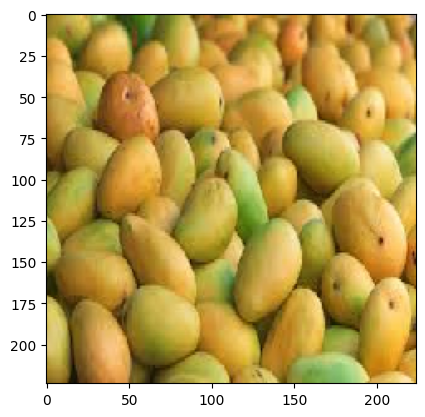

In [76]:
val_img_file = '/content/drive/MyDrive/Mangoes/Validation Data/download (1).jpg'
test_image = image.load_img(val_img_file, target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
class_dict = {0:'stage1', 1 : 'stage2', 2 : 'stage3', 3 : 'stage4'}
days_dict = {0:'0-5', 1 : '5-10', 2 : '10-15', 3 : '15-20'}
[print(class_dict[i],':', round(result[0][i], 3)) for i in range(len(result[0]))]
training_set.class_indices
print('Mangoes are currently in {}.'.format(class_dict[np.argmax(result)]))
arg_max = np.argmax(result)
print(60*'-')
if arg_max < 3:
  print('Expected to ripe in next {} days'.format(days_dict[arg_max]))
else:
  print('Already riped! or Expected to ripe in next {} days'.format(days_dict[arg_max]))
print(60*'-')

img = image.load_img(val_img_file, target_size=(224, 224))
x = image.img_to_array(img)
plt.imshow(x/255.)